## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [25]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [26]:
train, test = keras.datasets.cifar10.load_data()

In [27]:
## 資料前處理
def preproc_x(x):
    scaler = MinMaxScaler(feature_range = (-1, 1))
    x = x.reshape((len(x), -1))
    scaler.fit(x)
    x = scaler.transform(x)

    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [28]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [32]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528 

In [33]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [34]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [35]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 205us/step - loss: 1.8271 - accuracy: 0.3549 - val_loss: 1.5955 - val_accuracy: 0.4386
Epoch 2/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.5441 - accuracy: 0.4560 - val_loss: 1.4928 - val_accuracy: 0.4675
Epoch 3/100
50000/50000 [==============================] - 9s 188us/step - loss: 1.4175 - accuracy: 0.5007 - val_loss: 1.4267 - val_accuracy: 0.4935
Epoch 4/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.3231 - accuracy: 0.5343 - val_loss: 1.3900 - val_accuracy: 0.5102
Epoch 5/100
50000/50000 [==============================] - 10s 205us/step - loss: 1.2363 - accuracy: 0.5675 - val_loss: 1.3821 - val_accuracy: 0.5198
Epoch 6/100
50000/50000 [==============================] - 13s 250us/step - loss: 1.1538 - accuracy: 0.5946 - val_loss: 1.3642 - val_accuracy: 0.5270
Epoch 7/100
50000/50000 [===========================

50000/50000 [==============================] - 9s 187us/step - loss: 0.1068 - accuracy: 0.9646 - val_loss: 3.9237 - val_accuracy: 0.5286
Epoch 56/100
50000/50000 [==============================] - 9s 189us/step - loss: 0.0961 - accuracy: 0.9668 - val_loss: 3.8480 - val_accuracy: 0.5286
Epoch 57/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.1057 - accuracy: 0.9642 - val_loss: 3.8441 - val_accuracy: 0.5287
Epoch 58/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.1102 - accuracy: 0.9630 - val_loss: 3.8020 - val_accuracy: 0.5268
Epoch 59/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.0931 - accuracy: 0.9692 - val_loss: 3.8657 - val_accuracy: 0.5306
Epoch 60/100
50000/50000 [==============================] - 9s 188us/step - loss: 0.0974 - accuracy: 0.9670 - val_loss: 4.0547 - val_accuracy: 0.5228
Epoch 61/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.1145 - accuracy: 0.9625 - val

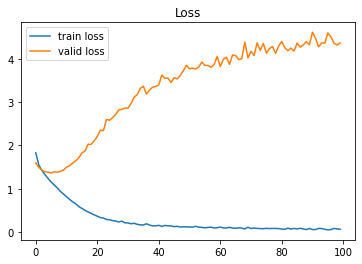

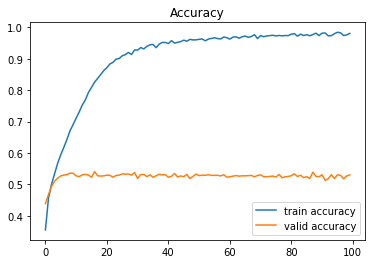

In [36]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()